# 2. Supervised Learning

* TODO: definitions

## Classification
### Suppor Vector Machine

* definitions
* figures and loss function - explain on whiteboard? Or with the example?

### Example 1: Classifying Sound Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn-darkgrid')

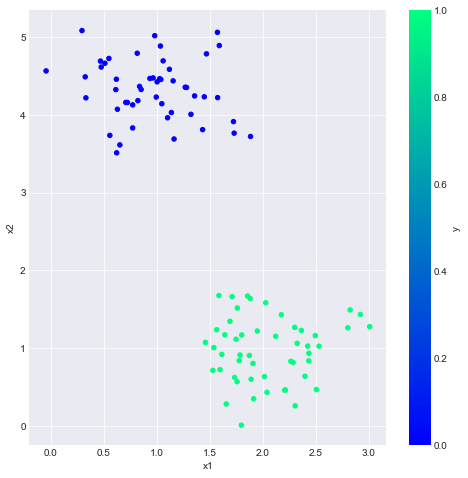

In [8]:
df = pd.read_csv('data/dataset.csv', index_col=0)
fig, ax = plt.subplots(figsize=(8, 8))
df.plot.scatter('x1', 'x2', c='y', cmap='winter', ax=ax);

In [3]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e99)
model.fit(df[['x1', 'x2']], df.y);

In [4]:
# TODO plot the optimization problem (min 0.5*||w||^2 with constraints)

In [5]:
def plot_decision_boundary(model, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1],
               linestyles=[':', '-', ':'])
    
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=120, marker='o', linewidth=1, facecolors='none', edgecolor='k');

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

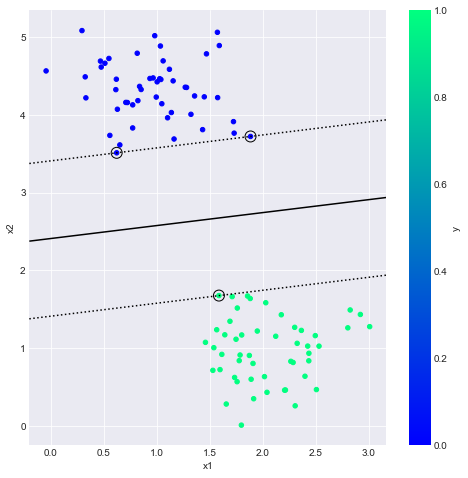

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
df.plot.scatter('x1', 'x2', c='y', cmap='winter', ax=ax)
plot_decision_boundary(model, ax)

### Example 2: Non-Linear Classification
* Something like this https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html#Beyond-linear-boundaries:-Kernel-SVM
* Mention slack variables